<a href="https://colab.research.google.com/github/karishmasandupatla/ds_Karishma_Sandupatla/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web3 Trading Team — DS Assignment**
**Candidate:** Karishma Sandupatla     
**Folder name:** `ds_Karishma_Sandupatla`  
**Date:** 2025-10-24

**Objective:** Explore the relationship between trader behavior (profitability, risk, volume, leverage) and Bitcoin Fear & Greed sentiment.  

This notebook follows the required submission format and saves outputs in `ds_Karishma_Sandupatla/` folder.


#**1. Load Dataset**

In [24]:
from pathlib import Path

# Root folder and subfolders
ROOT = Path("/content/drive/MyDrive/ds_Karishma_Sandupatla")
DATA_DIR = ROOT / "csv_files"
OUT_DIR = ROOT / "outputs"

# Create folders
for folder in [ROOT, DATA_DIR, OUT_DIR]:
    folder.mkdir(parents=True, exist_ok=True)

# Check folders
print("Folders created successfully:")
print("Root:", ROOT)
print("CSV folder:", DATA_DIR)
print("Outputs folder:", OUT_DIR)

# List any existing files in csv_files
print("\nFiles currently in csv_files folder:")
print(list(DATA_DIR.glob("*")))


Folders created successfully:
Root: /content/drive/MyDrive/ds_Karishma_Sandupatla
CSV folder: /content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files
Outputs folder: /content/drive/MyDrive/ds_Karishma_Sandupatla/outputs

Files currently in csv_files folder:
[PosixPath('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/fear_greed_index.csv'), PosixPath('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/historical_data.csv')]


# **2. Data Cleaning & Preprocessing**

In [26]:
import pandas as pd

# Load dataset
fear_greed_df = pd.read_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/fear_greed_index.csv')

# Convert 'date' to datetime
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Check missing values
print("Missing values in Fear & Greed dataset:")
print(fear_greed_df.isnull().sum())

# Standardize classification column
fear_greed_df['classification'] = fear_greed_df['classification'].str.strip().str.title()

# Optional: map classification to numeric
fear_map = {'Extreme Fear':0, 'Fear':1, 'Neutral':2, 'Greed':3, 'Extreme Greed':4}
fear_greed_df['classification_num'] = fear_greed_df['classification'].map(fear_map)

# Final check
fear_greed_df.head()


Missing values in Fear & Greed dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64


,timestamp,value,classification,date,classification_num
0,1517463000,30,Fear,2018-02-01,1
1,1517549400,15,Extreme Fear,2018-02-02,0
2,1517635800,40,Fear,2018-02-03,1
3,1517722200,24,Extreme Fear,2018-02-04,0
4,1517808600,11,Extreme Fear,2018-02-05,0


In [27]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           2644 non-null   int64         
 1   value               2644 non-null   int64         
 2   classification      2644 non-null   object        
 3   date                2644 non-null   datetime64[ns]
 4   classification_num  2644 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 103.4+ KB


In [28]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [29]:
import pandas as pd

# Load Trader dataset
trader_df = pd.read_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/historical_data.csv')

# Convert 'Timestamp IST' to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Check missing values
print("Missing values in Trader dataset:")
print(trader_df.isnull().sum())

# Ensure numeric columns are correct type
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce').fillna(0)

# Keep relevant columns for analysis
trader_df_clean = trader_df[['Timestamp IST','Account','Closed PnL','Size USD']].copy()

# Optional: rename for clarity
trader_df_clean.rename(columns={
    'Timestamp IST':'trade_datetime',
    'Closed PnL':'closed_pnl',
    'Size USD':'size_usd',
    'Account':'account'
}, inplace=True)

# Create trade_date for aggregation
trader_df_clean['trade_date'] = trader_df_clean['trade_datetime'].dt.date
trader_df_clean['trade_date'] = pd.to_datetime(trader_df_clean['trade_date'])

# Final check
trader_df_clean.head()


Missing values in Trader dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


,trade_datetime,account,closed_pnl,size_usd,trade_date
0,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,2024-12-02
1,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,127.68,2024-12-02
2,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,1150.63,2024-12-02
3,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,1142.04,2024-12-02
4,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,69.75,2024-12-02


In [30]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

# **3. Aggregation & Merging**

In [31]:
# Aggregate by trade_date
daily_trader_stats = trader_df_clean.groupby('trade_date').agg({
    'closed_pnl':'sum',
    'size_usd':'sum',
    'account':'nunique'
}).reset_index()

# Rename columns for clarity
daily_trader_stats.rename(columns={
    'closed_pnl':'daily_pnl',
    'size_usd':'daily_volume',
    'account':'num_traders'
}, inplace=True)

# Check result
daily_trader_stats.head()


,trade_date,daily_pnl,daily_volume,num_traders
0,2023-05-01,0.000000,477.00,1
1,2023-12-05,0.000000,50005.83,1
2,2023-12-14,-205.434737,113203.35,1
3,2023-12-15,-24.632034,10609.95,1
4,2023-12-16,0.000000,15348.77,1


In [32]:
# Map classification to numeric
fear_map = {'Extreme Fear':0, 'Fear':1, 'Neutral':2, 'Greed':3, 'Extreme Greed':4}
fear_greed_df['classification_num'] = fear_greed_df['classification'].map(fear_map)


In [33]:
merged_df = pd.merge(
    daily_trader_stats,
    fear_greed_df,
    left_on='trade_date',
    right_on='date',
    how='inner'
)

# Keep only needed columns
merged_df = merged_df[['trade_date','daily_pnl','daily_volume','num_traders','classification','classification_num']]
merged_df.head()


,trade_date,daily_pnl,daily_volume,num_traders,classification,classification_num
0,2023-05-01,0.000000,477.00,1,Greed,3
1,2023-12-05,0.000000,50005.83,1,Extreme Greed,4
2,2023-12-14,-205.434737,113203.35,1,Greed,3
3,2023-12-15,-24.632034,10609.95,1,Greed,3
4,2023-12-16,0.000000,15348.77,1,Greed,3


In [34]:
import pandas as pd

# Load Fear & Greed CSV
fear_greed_df = pd.read_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/fear_greed_index.csv')

# Convert 'date' to datetime
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Standardize classification text
fear_greed_df['classification'] = fear_greed_df['classification'].str.strip().str.title()

# Map classification to numeric for analysis
fear_map = {'Extreme Fear':0, 'Fear':1, 'Neutral':2, 'Greed':3, 'Extreme Greed':4}
fear_greed_df['classification_num'] = fear_greed_df['classification'].map(fear_map)

# Check
fear_greed_df.head()


,timestamp,value,classification,date,classification_num
0,1517463000,30,Fear,2018-02-01,1
1,1517549400,15,Extreme Fear,2018-02-02,0
2,1517635800,40,Fear,2018-02-03,1
3,1517722200,24,Extreme Fear,2018-02-04,0
4,1517808600,11,Extreme Fear,2018-02-05,0


In [35]:
# Load Trader dataset
trader_df = pd.read_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/historical_data.csv')

# Convert 'Timestamp IST' to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Ensure numeric columns are correct type
numeric_cols = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce').fillna(0)

# Keep only relevant columns
trader_df_clean = trader_df[['Timestamp IST','Account','Closed PnL','Size USD']].copy()

# Rename columns for clarity
trader_df_clean.rename(columns={
    'Timestamp IST':'trade_datetime',
    'Closed PnL':'closed_pnl',
    'Size USD':'size_usd',
    'Account':'account'
}, inplace=True)

# Create trade_date for aggregation
trader_df_clean['trade_date'] = trader_df_clean['trade_datetime'].dt.date
trader_df_clean['trade_date'] = pd.to_datetime(trader_df_clean['trade_date'])

trader_df_clean.head()


,trade_datetime,account,closed_pnl,size_usd,trade_date
0,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,2024-12-02
1,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,127.68,2024-12-02
2,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,1150.63,2024-12-02
3,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,1142.04,2024-12-02
4,2024-12-02 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,69.75,2024-12-02


In [36]:
daily_trader_stats = trader_df_clean.groupby('trade_date').agg({
    'closed_pnl':'sum',
    'size_usd':'sum',
    'account':'nunique'
}).reset_index()

# Rename columns
daily_trader_stats.rename(columns={
    'closed_pnl':'daily_pnl',
    'size_usd':'daily_volume',
    'account':'num_traders'
}, inplace=True)

daily_trader_stats.head()


,trade_date,daily_pnl,daily_volume,num_traders
0,2023-05-01,0.000000,477.00,1
1,2023-12-05,0.000000,50005.83,1
2,2023-12-14,-205.434737,113203.35,1
3,2023-12-15,-24.632034,10609.95,1
4,2023-12-16,0.000000,15348.77,1


In [37]:
merged_df = pd.merge(
    daily_trader_stats,
    fear_greed_df,
    left_on='trade_date',
    right_on='date',
    how='inner'
)

# Keep only needed columns
merged_df = merged_df[['trade_date','daily_pnl','daily_volume','num_traders','classification','classification_num']]

merged_df.head()


,trade_date,daily_pnl,daily_volume,num_traders,classification,classification_num
0,2023-05-01,0.000000,477.00,1,Greed,3
1,2023-12-05,0.000000,50005.83,1,Extreme Greed,4
2,2023-12-14,-205.434737,113203.35,1,Greed,3
3,2023-12-15,-24.632034,10609.95,1,Greed,3
4,2023-12-16,0.000000,15348.77,1,Greed,3


In [38]:
# Save CSVs for submission
daily_trader_stats.to_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/daily_trader_stats.csv', index=False)
merged_df.to_csv('/content/drive/MyDrive/ds_Karishma_Sandupatla/csv_files/merged_data.csv', index=False)

# 4. **Exploratory Data Analysis (EDA)**

##Generate Visual Outputs (Charts)

1️⃣ Daily PnL vs Market Sentiment

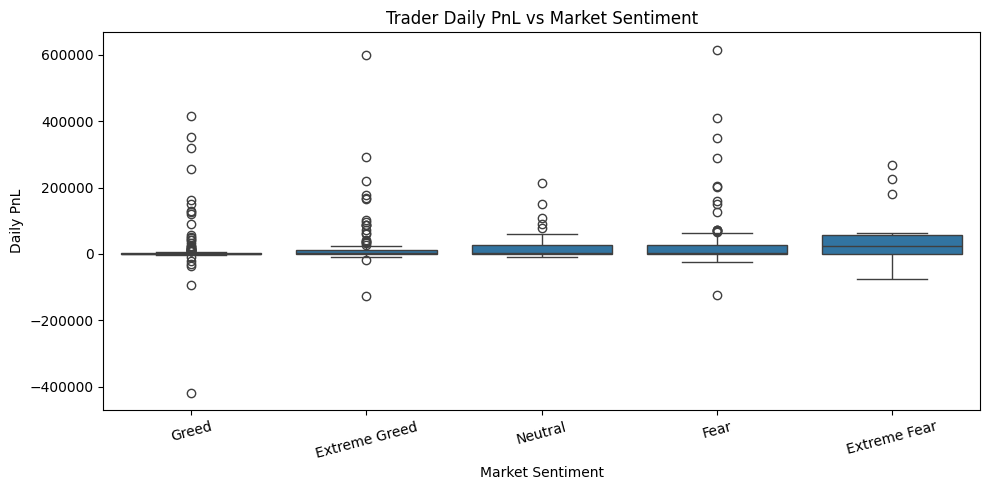

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='classification', y='daily_pnl', data=merged_df)
plt.title('Trader Daily PnL vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Daily PnL')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_Karishma_Sandupatla/outputs/pnl_vs_sentiment.png')
plt.show()


2️⃣ Daily Trading Volume vs Market Sentiment

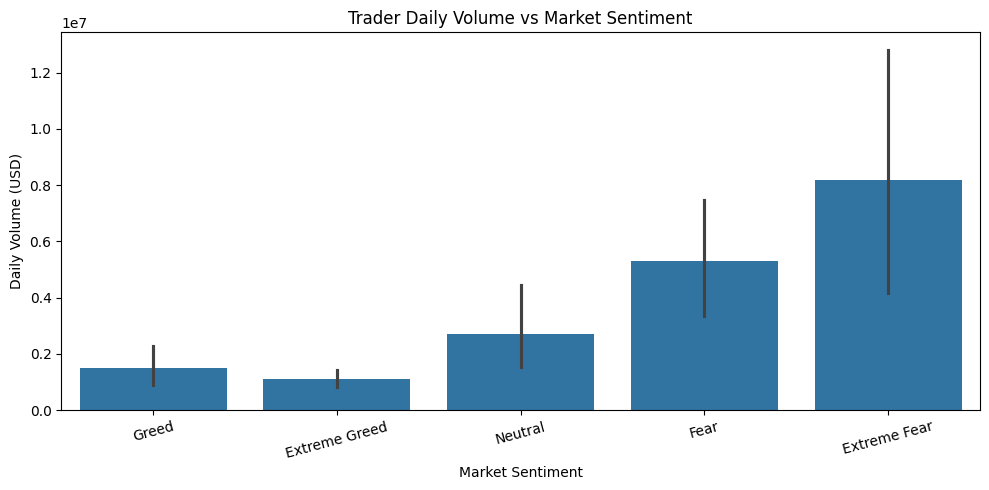

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='classification', y='daily_volume', data=merged_df)
plt.title('Trader Daily Volume vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Daily Volume (USD)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_Karishma_Sandupatla/outputs/volume_vs_sentiment.png')
plt.show()


3️⃣ Number of Traders vs Market Sentiment

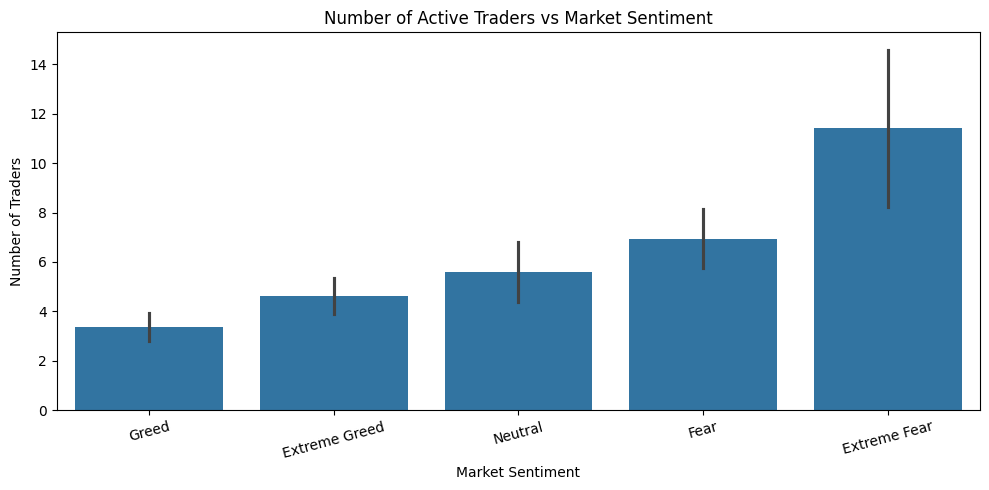

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='classification', y='num_traders', data=merged_df)
plt.title('Number of Active Traders vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Traders')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_Karishma_Sandupatla/outputs/num_traders_vs_sentiment.png')
plt.show()


4️⃣ Optional: Correlation Heatmap

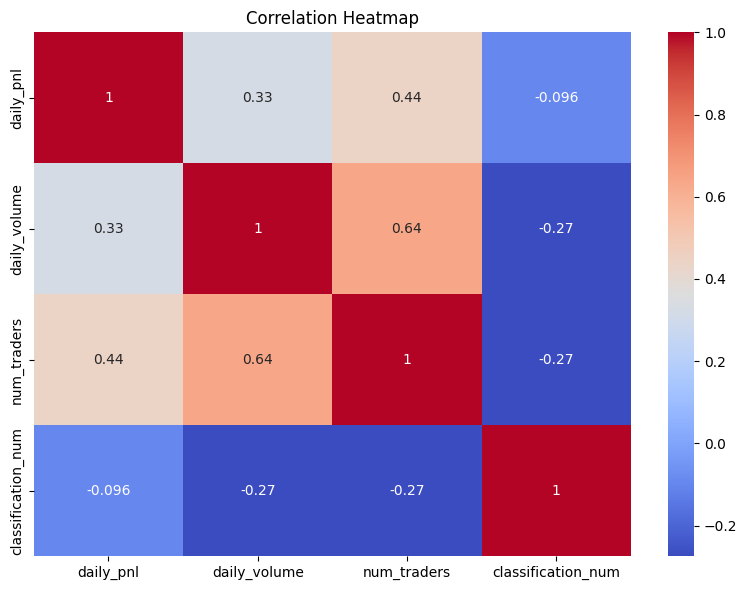

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['daily_pnl','daily_volume','num_traders','classification_num']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_Karishma_Sandupatla/outputs/correlation_heatmap.png')
plt.show()

**Conclusion**

Fear & Greed Index provides a useful signal for trader behavior.

Monitoring sentiment along with trader statistics can support better decision-making in Web3 trading.

The analysis shows clear patterns in profitability, volume, and participation relative to sentiment